In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv("trainFeatures.csv")
test_data = pd.read_csv("testFeatures.csv")
label = pd.read_csv("trainLabels.csv",header=None)

In [3]:
print(train_data.shape, test_data.shape, label.shape)

(34189, 14) (14653, 14) (34189, 1)


In [15]:
freq = label.apply(pd.value_counts)
print('<=50k:', freq[0][0])
print('>50k:',freq[0][1])

<=50k: 26021
>50k: 8168


In [12]:
frames = [train_data, test_data]
new_data = pd.concat(frames)

In [14]:
print(new_data.shape)

(48842, 14)


In [16]:
train_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,34189.000000,3.418900e+04,34189.000000,34189.000000,34189.000000,34189.000000
mean,38.646143,1.897921e+05,10.077101,1073.523765,87.645442,40.452836
std,13.679417,1.054070e+05,2.565457,7451.485819,403.366678,12.482635
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178470e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784490e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376240e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
test_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,14653.000000,1.465300e+04,14653.000000,14653.000000,14653.000000,14653.000000
mean,38.637617,1.893656e+05,10.080393,1092.002798,87.168361,40.351327
std,13.783251,1.060654e+05,2.583882,7453.501351,402.171907,12.176144
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.166320e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.774200e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376910e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.455435e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
new_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
print(new_data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'Marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


In [20]:
new_data.head()

,age,workclass,fnlwgt,education,education-num,Marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,24,Private,258298,Assoc-voc,11,Never-married,Tech-support,Not-in-family,White,Male,0,0,45,United-States
1,28,Private,208249,Some-college,10,Divorced,Tech-support,Not-in-family,White,Male,0,0,24,United-States
2,49,Private,143459,9th,5,Separated,Handlers-cleaners,Own-child,White,Male,0,0,38,United-States
3,24,Private,228772,5th-6th,3,Never-married,Machine-op-inspct,Other-relative,White,Female,0,0,40,Mexico
4,20,State-gov,41103,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States


In [22]:
new_data[new_data.isnull()].count()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
Marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [23]:
def cc(x):
    return sum(x==' ?')

In [24]:
new_data.apply(cc)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
Marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

In [25]:
new_data.loc[new_data.workclass == ' ?'].apply(cc)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
Marital-status       0
occupation        2799
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country      46
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
for i in new_data.columns:
    le = LabelEncoder()
    new_data[i]=le.fit_transform(new_data[i])

In [33]:
new_data.head()

,age,workclass,fnlwgt,education,education-num,Marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,7,4,21648,8,10,4,13,1,4,1,0,0,44,39
1,11,4,17582,15,9,0,13,1,4,1,0,0,23,39
2,32,4,9497,6,4,5,6,3,4,1,0,0,37,39
3,7,4,19520,4,2,4,7,2,4,0,0,0,39,26
4,3,7,1419,15,9,4,8,3,4,0,0,0,19,39


In [48]:
new_data['capital-gain'] = new_data['capital-gain'] - new_data['capital-loss']
new_data.drop(labels='capital-loss',axis=1,inplace=True)

In [49]:
X_train, X_test = new_data.iloc[0:train_data.shape[0]], new_data.iloc[train_data.shape[0]:]

In [50]:
print(X_train.shape, X_test.shape)

(34189, 13) (14653, 13)


In [51]:
Y_train = label

<BarContainer object of 13 artists>

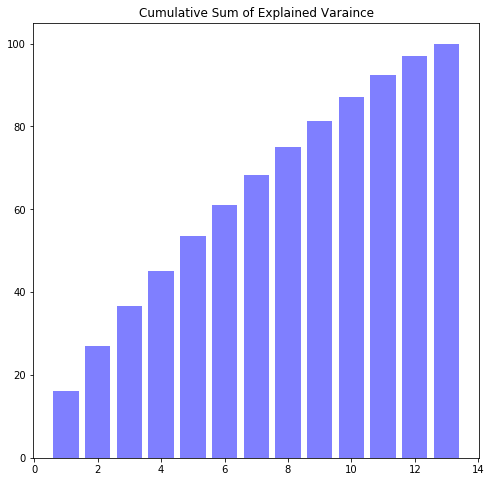

In [60]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X_train)
sklearn_pca = sklearnPCA(n_components=13)
Y_sklearn = sklearn_pca.fit_transform(X_std)
cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()
sklearn_pca.explained_variance_ratio_[:10].sum()
cum_sum = cum_sum*100
fig, ax = plt.subplots(figsize=(8,8))
plt.title("Cumulative Sum of Explained Varaince")
plt.bar(range(1,14), cum_sum, label='Cumulative_Sum_of_Explained_Varaince', color = 'b',alpha=0.5)

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, Y_train)
relval = etc.feature_importances_

C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


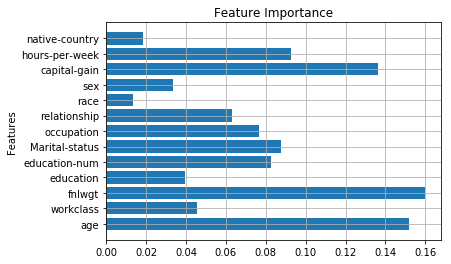

In [54]:
pos = np.arange(13) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("")
plt.ylabel("Features")
plt.yticks(pos, ('age','workclass','fnlwgt','education','education-num','Marital-status','occupation','relationship','race','sex','capital-gain','hours-per-week','native-country'))
plt.grid(True)

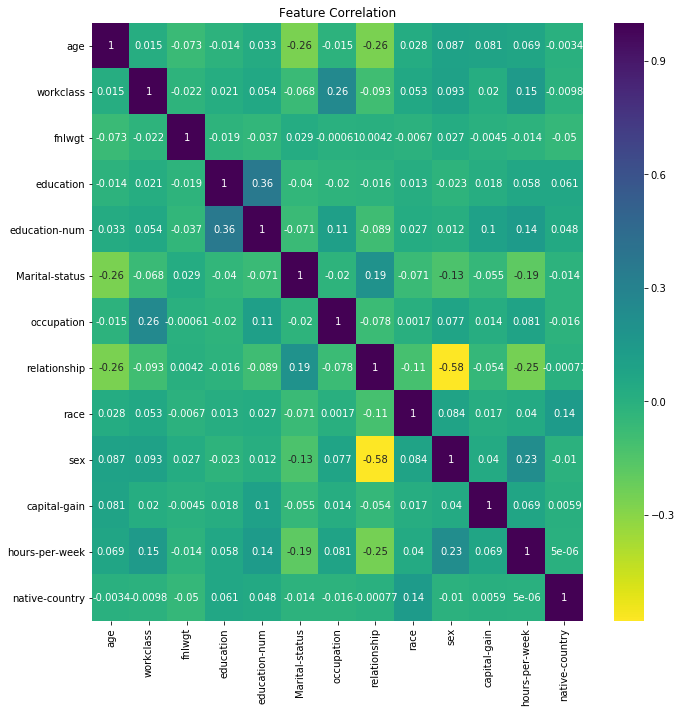

In [61]:
import seaborn as sns
plt.figure(figsize=(11,11))
colormap = plt.cm.viridis_r
sns.heatmap(X_train.corr(), vmax=1.0, cmap=colormap, annot=True)
plt.title("Feature Correlation")
plt.show()

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score

In [57]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('NB', GaussianNB()))
models.append(('Bag', BaggingClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=250,max_features=5)))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('ABC', AdaBoostClassifier()))

In [58]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=0)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\li

KNN: 0.772705 (0.007680)
NB: 0.824125 (0.005195)


C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A colu

Bag: 0.847378 (0.004103)


C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\s

RF: 0.858200 (0.004957)


C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A colu

GBC: 0.865746 (0.004227)


C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A colu

ABC: 0.858902 (0.003929)


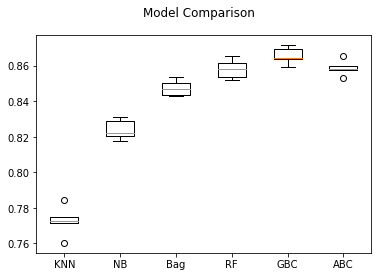

In [63]:
# Model Comparison
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# time consuming ...
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{
        "n_estimators":[150,200,250,300],
#         "min_samples_split":[200,300,500],
#         "subsample":[0.6,0.8],
#         "min_samples_leaf":[40,50,60,80,100]
    }]
gbc = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv=KFold(n_splits=5, random_state=0))
gbc.fit(X_train, Y_train)
print("Best parameters :")
print(gbc.best_params_)

In [64]:
gbc = GradientBoostingClassifier(n_estimators=50, min_samples_split=300, subsample=0.6,min_samples_leaf=60)
gbc.fit(X_train, Y_train)

C:\Users\pcaoaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=60, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=0.6, verbose=0,
              warm_start=False)

In [65]:
Y_test = gbc.predict(X_test)

In [67]:
unique, counts = np.unique(Y_test, return_counts=True)
dict(zip(unique, counts))

{0: 12253, 1: 2400}